In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import StandardScaler


# EXPLORING THE DATA

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ColabData/fraud/Fraud.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
#fraudulent and normal transactions

print ("Fraud")
print (data.isFraud[data.isFraud == 1].describe())
print ()
print ("Normal")
print (data.isFraud[data.isFraud == 0].describe())


Fraud
count    8213.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: isFraud, dtype: float64

Normal
count    6354407.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: isFraud, dtype: float64


In [ ]:
#FLAGGED TRANSACTION
print ("Flagged Fraud")
print (data.isFlaggedFraud[data.isFlaggedFraud == 1].describe())
print ()
print ("Flagged Normal")
print (data.isFlaggedFraud[data.isFlaggedFraud == 0].describe())



Flagged Fraud
count    16.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: isFlaggedFraud, dtype: float64

Flagged Normal
count    6362604.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: isFlaggedFraud, dtype: float64


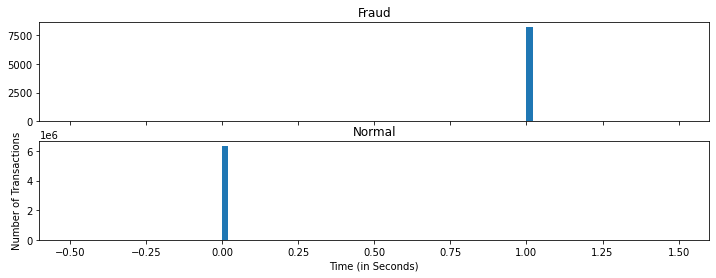

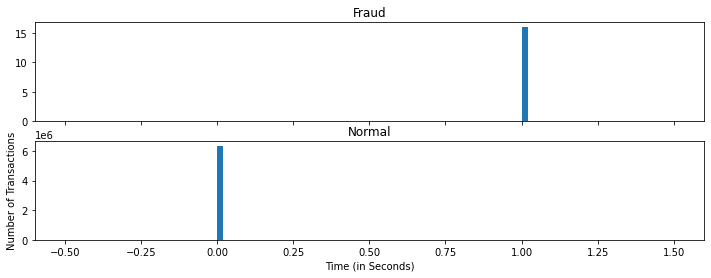

In [ ]:
#plot peaks

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(data.isFraud[data.isFraud == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(data.isFraud[data.isFraud == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

#plot flagged peak

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(data.isFlaggedFraud[data.isFlaggedFraud == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(data.isFlaggedFraud[data.isFlaggedFraud == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

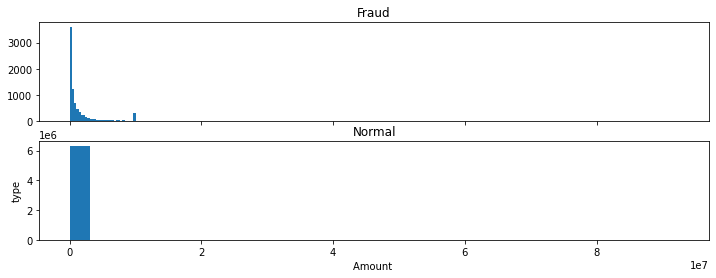

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(data.amount[data.isFraud == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(data.amount[data.isFraud == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ')
plt.ylabel('type')

plt.show()



In [ ]:
data.isnull().values.any()

False

In [ ]:
print(data.loc[data.isFraud == 1].type.drop_duplicates().values)

['TRANSFER' 'CASH_OUT']


In [ ]:
fraud_transfer=data.loc[(data.isFraud==1) & (data.type=='TRANSFER')]
fraud_cashout=data.loc[(data.isFraud==1) & (data.type=='CASH_OUT')]
print(len(fraud_transfer))
print(len(fraud_cashout))

4097
4116


In [ ]:
print(data.loc[data.isFlaggedFraud == 1].type.drop_duplicates().values)

['TRANSFER']


In [ ]:
data_transfer=data.loc[data.type=='Transfere']
flagged_data=data.loc[data.isFlaggedFraud==1]
not_flagged_data=data.loc[data.isFlaggedFraud==0]
print('Minimum amount isFlaggedFraud is set= {}'\
                                  .format(flagged_data.amount.min()))

print('Maximum amount  isFlaggedFraud is not set=\
 {}'.format(data_transfer.loc[data_transfer.isFlaggedFraud == 0].amount.max()))

Minimum amount isFlaggedFraud is set= 353874.22
Maximum amount  isFlaggedFraud is not set= nan


In [ ]:
print('The number of TRANSFERs where isFlaggedFraud = 0, when oldbalanceDest = 0 and\
 newbalanceDest = 0: {}'.\
format(len(data_transfer.loc[(data_transfer.isFlaggedFraud == 0) & \
(data_transfer.oldbalanceDest == 0) & (data_transfer.newbalanceDest == 0)])))

The number of TRANSFERs where isFlaggedFraud = 0, when oldbalanceDest = 0 and newbalanceDest = 0: 0


# EDA


    # Data cleaning

In [ ]:
X = data.loc[(data.type == 'TRANSFER') | (data.type == 'CASH_OUT')]

randomState = 5
np.random.seed(randomState)



Y = X['isFraud']
del X['isFraud']


X = X.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis = 1)


X.loc[X.type == 'TRANSFER', 'type'] = 0
X.loc[X.type == 'CASH_OUT', 'type'] = 1
X.type = X.type.astype(int) # convert data type


    # missing value operations

In [ ]:
Xfraud = X.loc[Y == 1]
XnonFraud = X.loc[Y == 0]
print('\nThe fraction of fraudulent transactions with \'oldbalanceDest\' = \
\'newbalanceDest\' = 0 although the transacted \'amount\' is non-zero is: {}'.\
format(len(Xfraud.loc[(Xfraud.oldbalanceDest == 0) & \
(Xfraud.newbalanceDest == 0) & (Xfraud.amount)]) / (1.0 * len(Xfraud))))

print('\nThe fraction of genuine transactions with \'oldbalanceDest\' = \
newbalanceDest\' = 0 although the transacted \'amount\' is non-zero is: {}'.\
format(len(XnonFraud.loc[(XnonFraud.oldbalanceDest == 0) & \
(XnonFraud.newbalanceDest == 0) & (XnonFraud.amount)]) / (1.0 * len(XnonFraud))))




The fraction of fraudulent transactions with 'oldbalanceDest' = 'newbalanceDest' = 0 although the transacted 'amount' is non-zero is: 0.4955558261293072

The fraction of genuine transactions with 'oldbalanceDest' = newbalanceDest' = 0 although the transacted 'amount' is non-zero is: 0.0006176245277308345


# Labeling of Data

In [ ]:
#replace the value of 0 with -1
X.loc[(X.oldbalanceDest == 0) & (X.newbalanceDest == 0) & (X.amount != 0), \
      ['oldbalanceDest', 'newbalanceDest']] = - 1

In [ ]:
#replace the value of 0 with a null value.
X.loc[(X.oldbalanceOrg == 0) & (X.newbalanceOrig == 0) & (X.amount != 0), \
      ['oldbalanceOrg', 'newbalanceOrig']] = np.nan


# Feature extraction

In [ ]:
#feature extraction
X['errorbalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
X['errorbalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest

# Data Splitting 

In [ ]:
#train 70% test 30%
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.3, \
                                                random_state = randomState)

In [ ]:
trainX.shape

(1939286, 9)

In [ ]:
testX.shape

(831123, 9)

In [ ]:
scaler = StandardScaler()
trainX = scaler.fit_transform(trainX)
testX = scaler.transform(testX)


In [ ]:
trainY = trainY.to_numpy()
testY = testY.to_numpy()

In [ ]:
trainX.shape, testX.shape

((1939286, 9), (831123, 9))

# Model and its Testing

In [ ]:
#Skew data
print(len(Xfraud) / float(len(X)))

0.002964544224336551


In [ ]:
from xgboost.sklearn import XGBClassifier
weights = (Y == 0).sum() / (1.0 * (Y == 1).sum())
clf = XGBClassifier(max_depth = 3, scale_pos_weight = weights, \
                n_jobs = 4)
probabilities = clf.fit(trainX, trainY).predict_proba(testX)
print('AUPRC = {}'.format(average_precision_score(testY, \
                                              probabilities[:, 1])))

AUPRC = 0.9990918135309921
